In [1]:
from sklearn import datasets
import warnings
warnings.filterwarnings(action='once')
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax3d
import seaborn as sns; sns.set()
import numpy as np
from sklearn.utils import shuffle
from sklearn.mixture import GMM
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

/home/supercloud/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/supercloud/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/supercloud/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/supercloud/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/supercloud/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/s

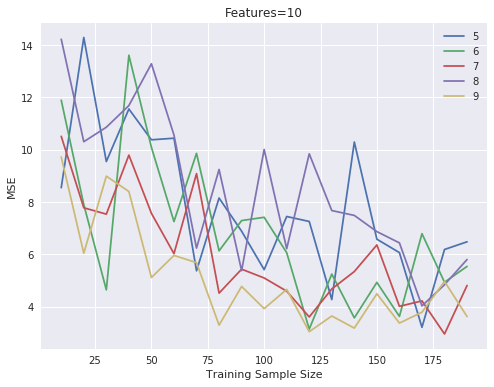

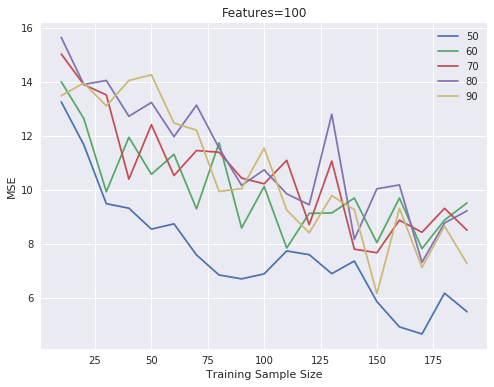

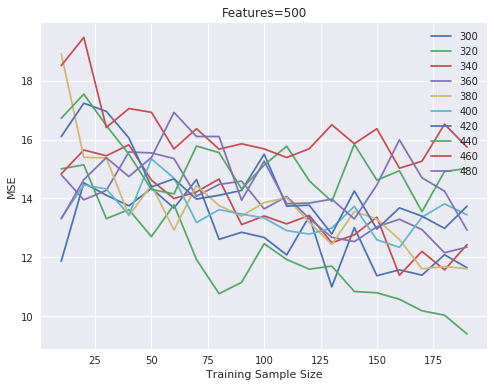

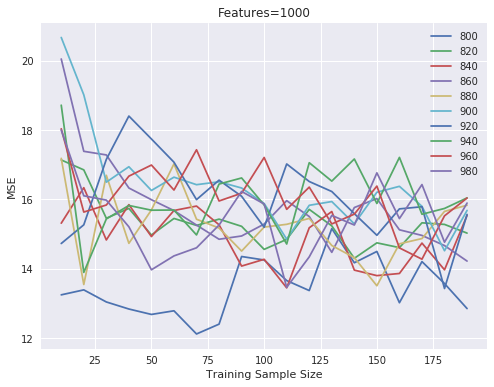

In [18]:
features = [10,100,500,1000]

for f in features:
    plt.figure(figsize=(8, 6))
    if f <= 5:
        inform = [i for i in range(f-2,f)]
    elif f <= 10:
        inform = [i for i in range(f-5,f)]
    elif f <= 100:
        inform = [i for i in range(f-50,f, 10)]
    elif f <= 1000:
        inform = [i for i in range(f-200,f,20)]
    classes = 10
    w = [1/classes for i in range(classes)]
    
    for infos in inform:
        X, Y = make_classification(n_samples=1000, 
                                   n_features = f, 
                                   n_informative = infos, 
                                   n_redundant=f-infos, 
                                   n_classes = classes, 
                                   n_clusters_per_class=1, 
                                   weights = w,
                                   class_sep = 2,
                                   random_state=0)
    
        #SGD SVM
        result = []
        n_trains = np.arange(10,200,10)
        for n_train in range(10,200,10):
            train_X = X[:n_train]
            train_Y = Y[:n_train]
            test_X = X[n_train:]
            test_Y = Y[n_train:]
            cl = linear_model.SGDClassifier()
            cl.fit(train_X, train_Y)
            pred= cl.predict(test_X)
            result.append(mean_squared_error(test_Y, pred))
        plt.plot(n_trains, result, label=infos)
        plt.title('Features='+str(f))
        plt.xlabel('Training Set Size')
        plt.ylabel('MSE')
        plt.legend(loc='best')

/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/u

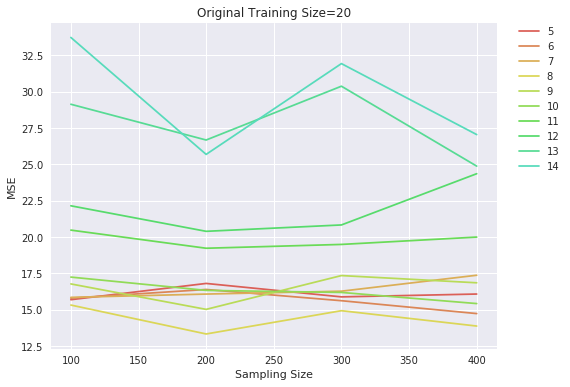

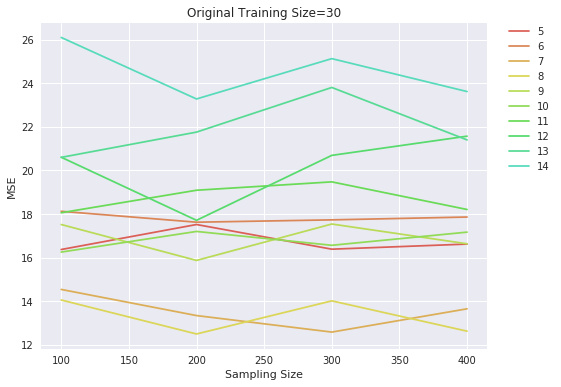

In [27]:
features = 1000
infos = 1000
classes = 10
w = [1/classes for i in range(classes)]
sns.set_palette(sns.color_palette("hls", 20))
X, Y = make_classification(n_samples=1000, 
                           n_features = features, 
                           n_informative = infos, 
                           n_redundant=features-infos, 
                           n_classes = classes, 
                           n_clusters_per_class=1, 
                           weights = w,
                           class_sep = 2,
                           random_state=0)
    
#SGD SVM
org_result = []
n_trains = np.arange(20,40,10)
for n_train in range(20,40,10):
    train_X = X[:n_train]
    train_Y = Y[:n_train]
    test_X = X[n_train:]
    test_Y = Y[n_train:]
    cl = linear_model.SGDClassifier()
    cl.fit(train_X, train_Y)
    pred= cl.predict(test_X)
    org_result.append(mean_squared_error(test_Y, pred))
    
    n_components = np.arange(classes-5,classes+5)
    models = [GMM(n, covariance_type='full', random_state=0).fit(train_X) for n in n_components]

    n_sample = 500


    plt.figure(figsize=(8, 6))
    for k in range(len(n_components)):
        gmm_res = []
        for n in range(100,n_sample,100):
            samples_X = models[k].sample(n, random_state=0)
            samples_Y = models[k].predict(samples_X)
            cl = linear_model.SGDClassifier(n_jobs=2)
            cl.fit(samples_X, samples_Y)
            pred= cl.predict(test_X)
            gmm_res.append(mean_squared_error(test_Y, pred))
        plt.plot(np.arange(100,n_sample,100), gmm_res, label=str(n_components[k]))
    plt.title('Original Training Size='+str(n_train))
    plt.xlabel('Sampling Size')
    plt.ylabel('MSE')
    #plt.legend(loc='best')
    plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
#plt.plot(n_trains, result, label=infos)

In [ ]:
f = 1500

infos = 1500
classes = 10
w = [1/classes for i in range(classes)]
num_trials = 30
n_trains = np.arange(10,200,10)
result = [0 for i in range(len(n_trains))]
gmm_result = [0 for i in range(len(n_trains))]

for gm_num in range(7,11):
    plt.figure(figsize=(8, 6))
    for trial in range(num_trials):
        X, Y = make_classification(n_samples=1000, 
                                   n_features = f, 
                                   n_informative = infos, 
                                   n_redundant=f-infos, 
                                   n_classes = classes, 
                                   n_clusters_per_class=1, 
                                   weights = w,
                                   class_sep = 2,
                                   random_state=trial)

        #SGD SVM

        for n_train in range(len(n_trains)):
            train_X = X[:n_trains[n_train]]
            train_Y = Y[:n_trains[n_train]]
            test_X = X[n_trains[n_train]:]
            test_Y = Y[n_trains[n_train]:]
            cl = linear_model.SGDClassifier()
            cl.fit(train_X, train_Y)
            pred= cl.predict(test_X)
            result[n_train] += (mean_squared_error(test_Y, pred))

            gmm = GMM(gm_num, covariance_type='full', random_state=n_train).fit(train_X)
            samples_X = gmm.sample(1000, random_state=n_train)
            samples_Y = gmm.predict(samples_X)
            cl = linear_model.SGDClassifier(n_jobs=2)
            cl.fit(samples_X, samples_Y)
            pred= cl.predict(test_X)
            gmm_result[n_train] += (mean_squared_error(test_Y, pred))
    plt.plot(n_trains, [x/num_trials for x in result], label='Original')
    plt.plot(n_trains, [x/num_trials for x in gmm_result], label = 'Original+Sampled')
    plt.title('Features='+str(f))
    plt.xlabel('Training Set Size')
    plt.ylabel('MSE')
    plt.legend(loc='best')

/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/supercloud/anaconda3/lib/python3.6/site-packages/sklearn/u

In [ ]:
features = np.arange(1000,2000,200)
plt.figure(figsize=(8, 6))
infos = features
classes = 10
w = [1/classes for i in range(classes)]
num_trials = 30
n_train = 30
result = [0 for i in range(len(features))]
gmm_result = [0 for i in range(len(features))]
for trial in range(num_trials):


    #SGD SVM

    for index, f in enumerate(features):
        print(f, classes)
        num = f
        X, Y = make_classification(n_samples=1000, 
                           n_features = int(f), 
                           n_informative = int(f), 
                           n_redundant=0, 
                           n_classes = classes, 
                           n_clusters_per_class=1, 
                           weights = w,
                           class_sep = 2,
                           random_state=f)
        train_X = X[:n_train]
        train_Y = Y[:n_train]
        test_X = X[n_train:]
        test_Y = Y[n_train:]
        cl = linear_model.SGDClassifier()
        cl.fit(train_X, train_Y)
        pred= cl.predict(test_X)
        result[index] += (mean_squared_error(test_Y, pred))

        gmm = GMM(8, covariance_type='full', random_state=0).fit(train_X)
        samples_X = gmm.sample(200, random_state=0)
        samples_Y = gmm.predict(samples_X)
        cl = linear_model.SGDClassifier(n_jobs=2)
        cl.fit(samples_X, samples_Y)
        pred= cl.predict(test_X)
        gmm_result[index] += (mean_squared_error(test_Y, pred))
plt.plot(features, [x/num_trials for x in result], label='Original')
plt.plot(features, [x/num_trials for x in gmm_result], label = 'Original+Sampled')
plt.title('Features='+str(f))
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.legend(loc='best')

In [ ]:
features = np.arange(1000,2000,200)
plt.figure(figsize=(8, 6))
infos = features
classes = 10
w = [0.05,0.05, 0.2,0.2,0.3,0.03,0.03,0.03,0.03]
num_trials = 10
n_train = 30
result = [0 for i in range(len(features))]
gmm_result = [0 for i in range(len(features))]
for trial in range(num_trials):


    #SGD SVM

    for index, f in enumerate(features):
        print(f, classes)
        num = f
        X, Y = make_classification(n_samples=1000, 
                           n_features = int(f), 
                           n_informative = int(f), 
                           n_redundant=0, 
                           n_classes = classes, 
                           n_clusters_per_class=1, 
                           weights = w,
                           class_sep = 2,
                           random_state=f)
        train_X = X[:n_train]
        train_Y = Y[:n_train]
        test_X = X[n_train:]
        test_Y = Y[n_train:]
        cl = linear_model.SGDClassifier()
        cl.fit(train_X, train_Y)
        pred= cl.predict(test_X)
        result[index] += (mean_squared_error(test_Y, pred))

        gmm = GMM(8, covariance_type='full', random_state=0).fit(train_X)
        samples_X = gmm.sample(200, random_state=0)
        samples_Y = gmm.predict(samples_X)
        cl = linear_model.SGDClassifier(n_jobs=2)
        cl.fit(samples_X, samples_Y)
        pred= cl.predict(test_X)
        gmm_result[index] += (mean_squared_error(test_Y, pred))
plt.plot(features, [x/num_trials for x in result], label='Original')
plt.plot(features, [x/num_trials for x in gmm_result], label = 'Original+Sampled')
plt.title('Features='+str(f))
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.legend(loc='best')

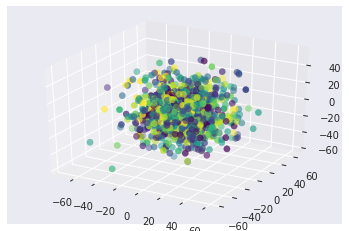

In [65]:
fig = plt.figure()
newax = fig.add_subplot(111, projection='3d')
newax.scatter(X[:,0], X[:,1], X[:,2], zdir='z', c=Y, s=40, cmap='viridis')